In [1]:
library(harmony)
library(Seurat)

Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.2.3”
Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
scRNA = readRDS('./after_rename.rds')

In [3]:
DefaultAssay(scRNA) = 'RNA'

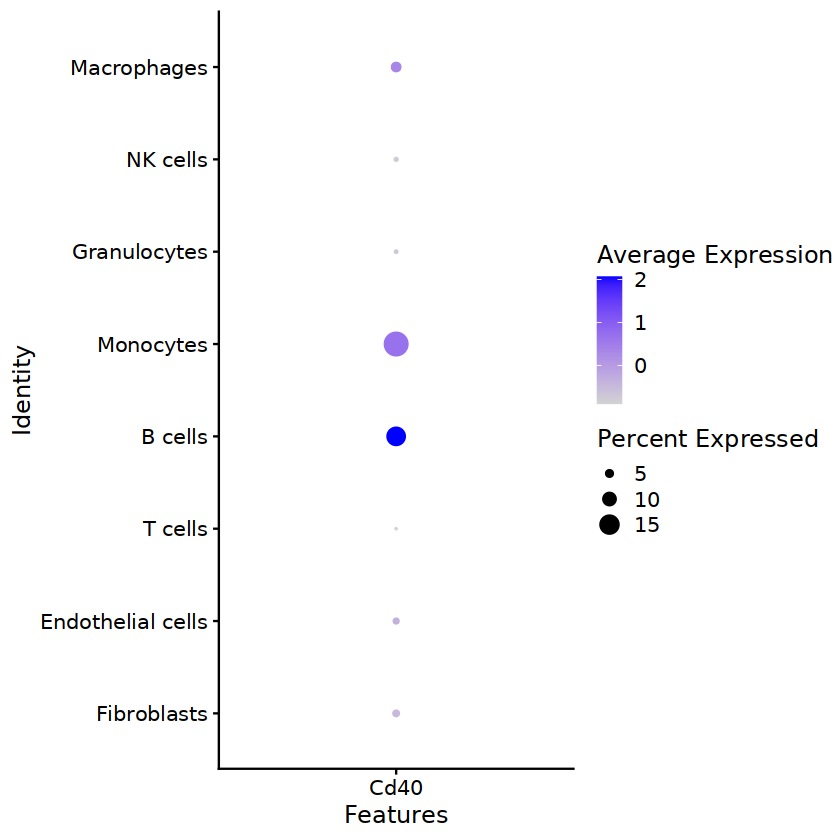

In [4]:
DotPlot(scRNA,features = 'Cd40')

In [5]:
Idents(scRNA) ='orig.ident'

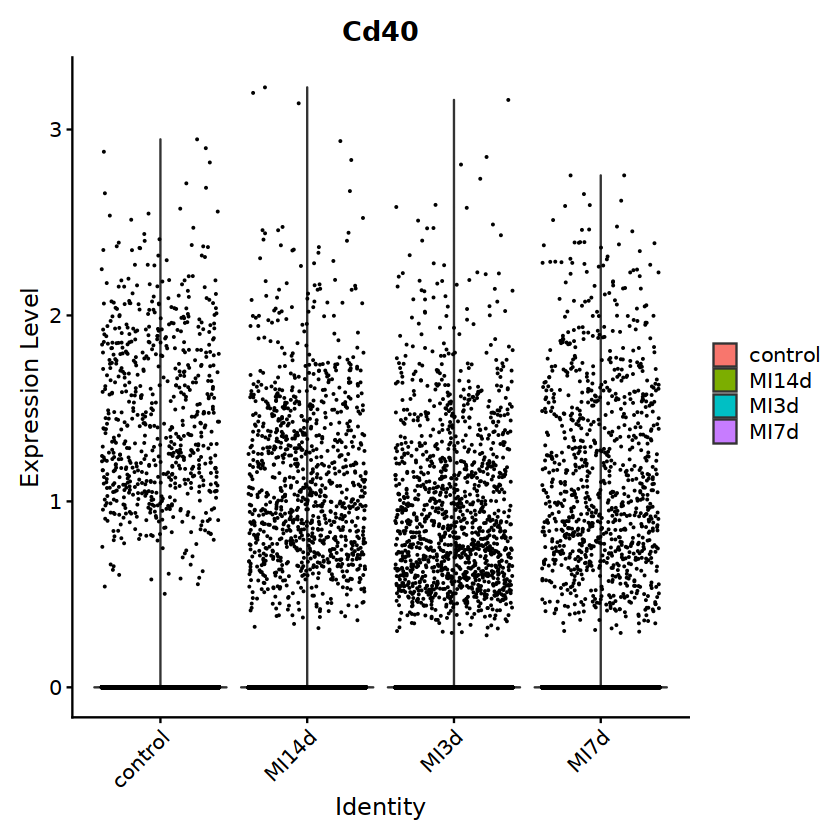

In [6]:
VlnPlot(scRNA,features = 'Cd40')

In [7]:
Idents(scRNA) ='celltype'

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



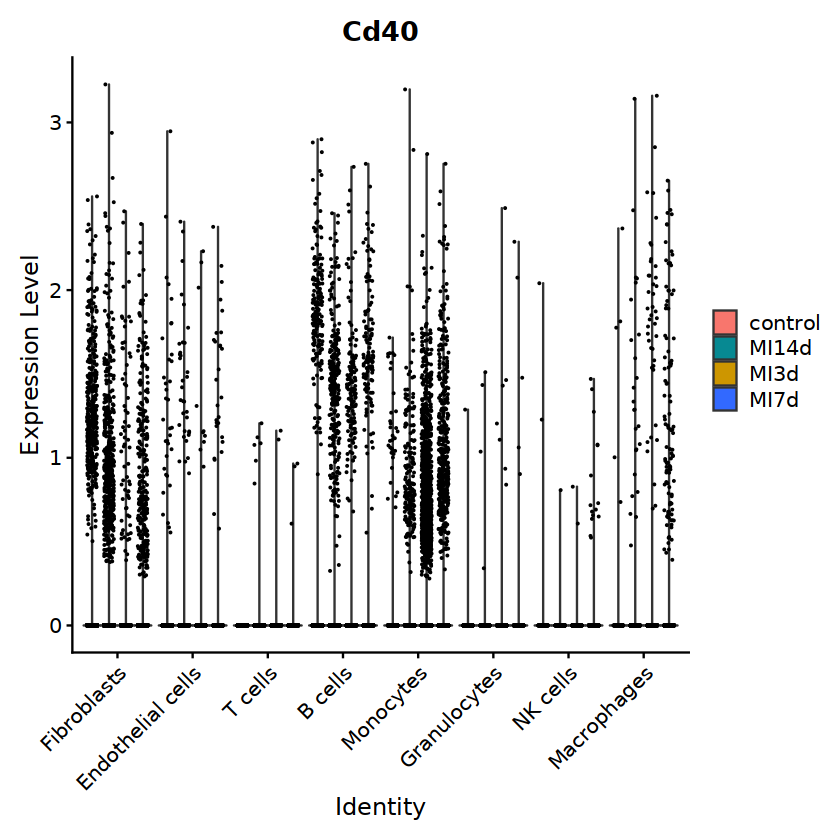

In [8]:
VlnPlot(scRNA,features = 'Cd40',split.by = 'orig.ident')

In [9]:
Idents(scRNA) = 'celltype'
myeloid = subset(scRNA, idents= c('Macrophages','Monocytes'))

In [10]:
table(myeloid$celltype)


Macrophages   Monocytes 
       2752        8725 

In [12]:
immune.combined = myeloid

In [155]:
# immune.combined <-NormalizeData(immune.combined) %>% FindVariableFeatures()
# immune.combined<-ScaleData(immune.combined,feature=rownames(immune.combined)) %>% RunPCA(verbose = FALSE) %>% RunHarmony( group.by.vars = "orig.ident")
# immune.combined<-RunUMAP(immune.combined, reduction = "harmony", dims = 1:20)
# immune.combined<-RunTSNE(immune.combined, reduction = "harmony", dims = 1:20)
# immune.combined <- FindNeighbors(immune.combined, reduction = "harmony", dims = 1:20) %>% FindClusters()

In [156]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:10)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:10)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:10)
immune.combined <- FindClusters(immune.combined,resolution = 0.2)

10:28:16 UMAP embedding parameters a = 0.9922 b = 1.112

10:28:16 Read 11477 rows and found 10 numeric columns

10:28:16 Using Annoy for neighbor search, n_neighbors = 30

10:28:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:28:17 Writing NN index file to temp file /tmp/RtmpP4xn33/file44257cfdcf6

10:28:17 Searching Annoy index using 1 thread, search_k = 3000

10:28:22 Annoy recall = 100%

10:28:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:28:24 Initializing from normalized Laplacian + noise (using irlba)

10:28:25 Commencing optimization for 200 epochs, with 457598 positive edges

10:28:43 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11477
Number of edges: 351023

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 9
Elapsed time: 1 seconds


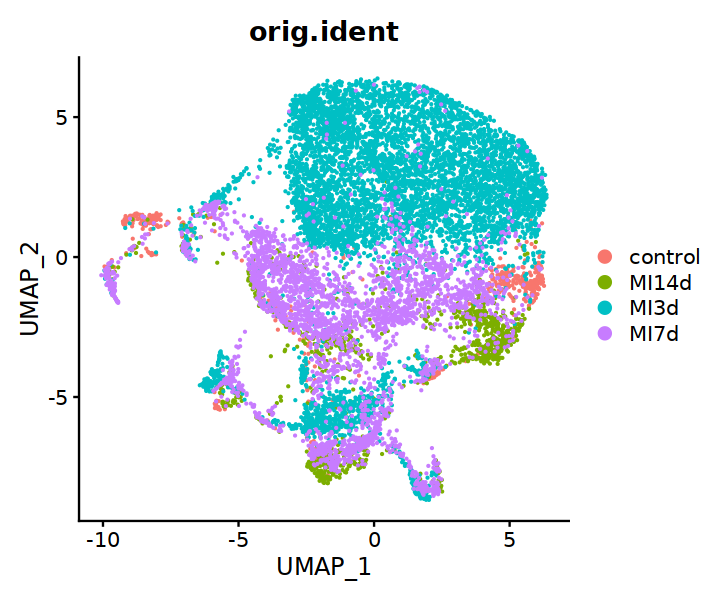

In [270]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

In [271]:
ggsave('mmacro1.pdf',height =  5,width = 6)

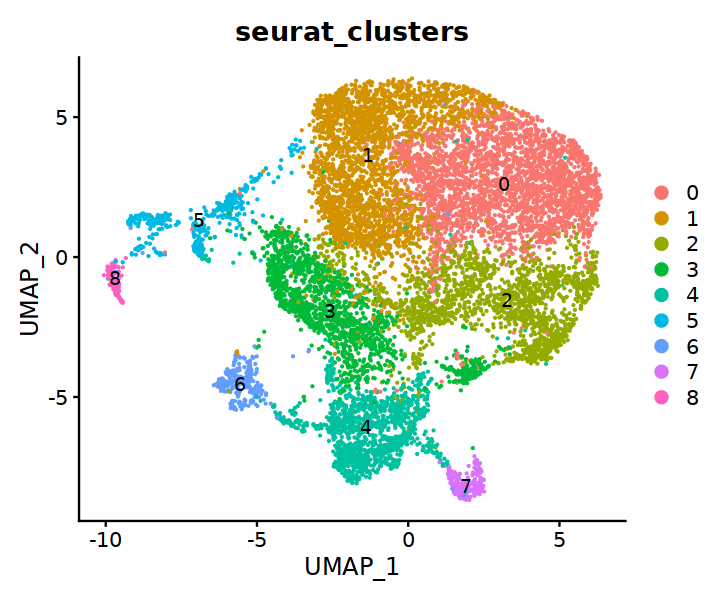

In [272]:
DimPlot(immune.combined, reduction = "umap", group.by = "seurat_clusters",label = T)

In [273]:
ggsave('mmacro2.pdf',height =  5,width = 6)

In [274]:
table(immune.combined$seurat_clusters)


   0    1    2    3    4    5    6    7    8 
2959 2705 1785 1538 1415  458  276  206  135 

In [315]:
table(scRNA$celltype)


          B cells Endothelial cells       Fibroblasts      Granulocytes 
             5067              3190             31021              1302 
      Macrophages         Monocytes          NK cells           T cells 
             2752              8725              1159              3857 

In [316]:
DimPlot(immune.combined, reduction = "umap", split.by  = "orig.ident",ncol = 2)

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [277]:
ggsave('mmacro3.pdf',height =  12,width = 12)

In [178]:
options(repr.plot.width = 5,repr.plot.height = 5)

In [317]:
FeaturePlot(immune.combined,features = 'Trem2',label =T,reduction = 'umap')

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [164]:
## 0,1  单核  4 Ccr7 MO 巨噬细胞   2  Tnip3  H2Aa   对应这篇文章https://www.jianshu.com/p/60c3f12ce000中Mac5       3  增殖性巨噬细胞

In [318]:
table(immune.combined$seurat_clusters)


   0    1    2    3    4    5    6    7    8 
2959 2705 1785 1538 1415  458  276  206  135 

In [319]:
saveRDS(immune.combined,file = 'macro.rds')

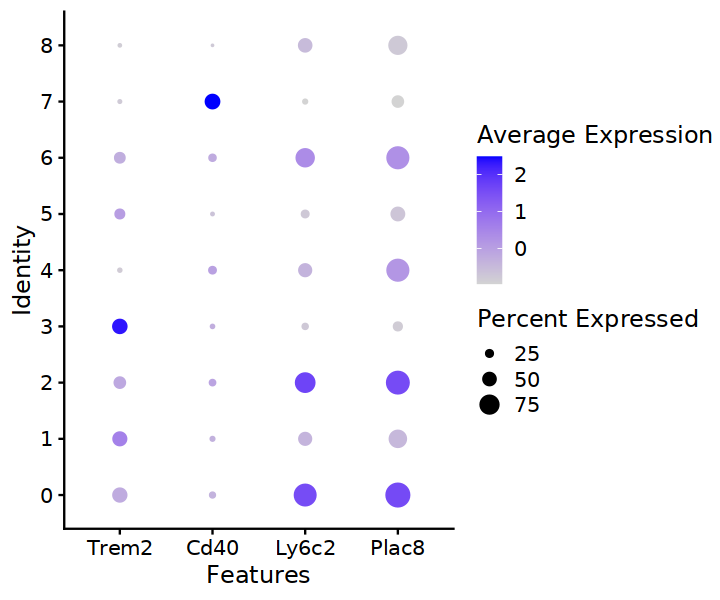

In [278]:
DotPlot(immune.combined,features = c('Trem2','Cd40','Ly6c2','Plac8'),group.by = 'seurat_clusters')

In [167]:
Idents(immune.combined) = 'seurat_clusters'
sce.markers <- FindAllMarkers(object = immune.combined, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



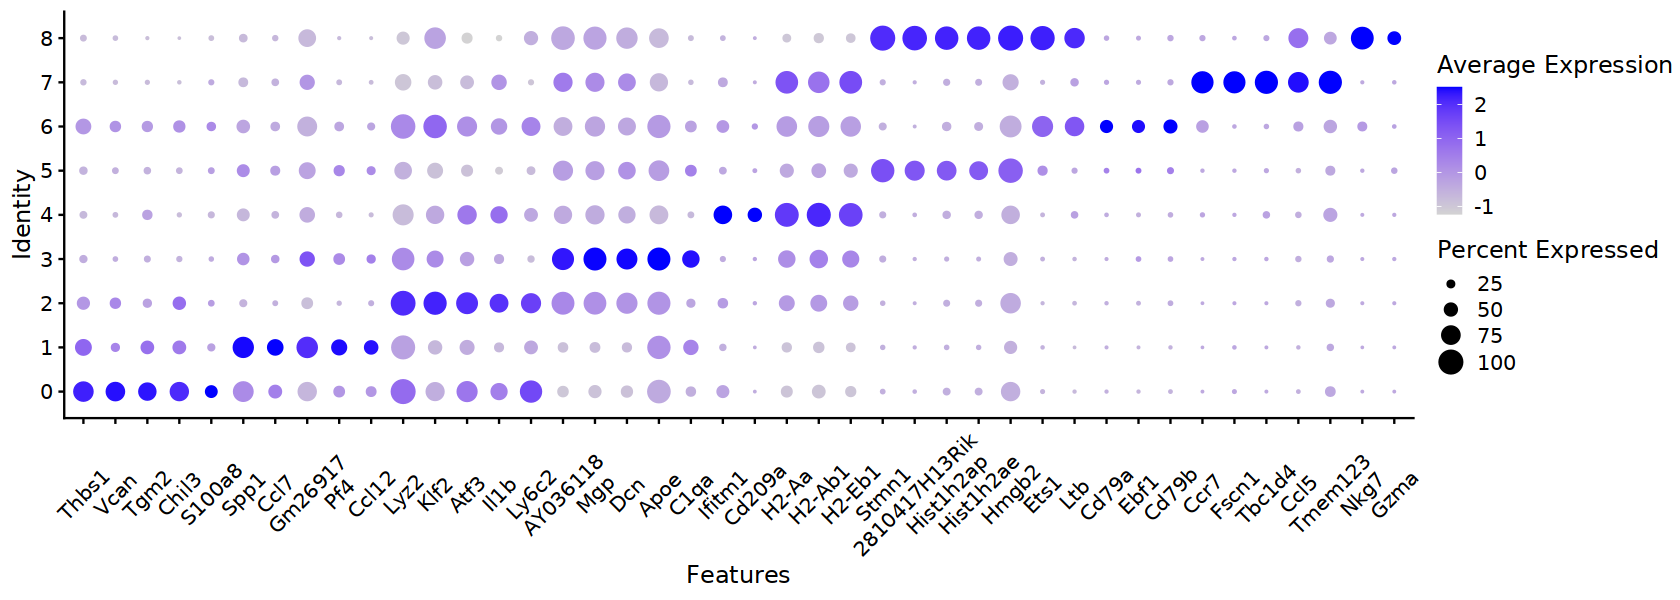

In [228]:
library(dplyr) 
library(ggplot2)
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
options(repr.plot.height = 5,repr.plot.width = 14)
DotPlot(immune.combined, features = unique(top5$gene) ,
assay='RNA' ) + theme(axis.text.x = element_text(angle = 45, 
vjust = 0.5, hjust=0.5))

In [229]:
ggsave('mmacro4.pdf',height =  5,width = 15)

In [260]:
write.csv(sce.markers,file = 'myeloid.csv')

In [231]:
pbmc.markers = sce.markers

In [232]:
pbmc.markers <- pbmc.markers %>%mutate(type = ifelse(avg_log2FC >=0,"Up","Down"))%>%mutate(type2 = ifelse(p_val_adj < 0.05,"adjust Pvalue < 0.05","adjust Pvalue >= 0.05"))

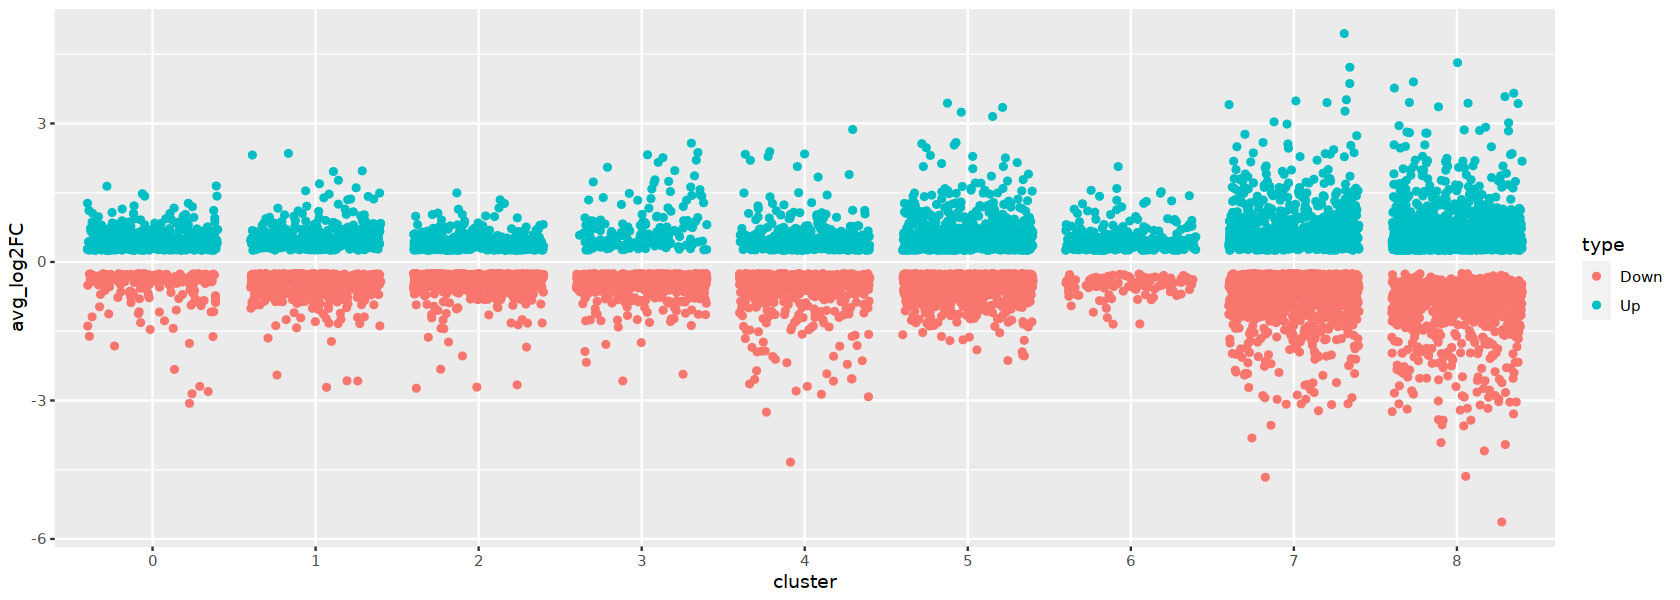

In [233]:
ggplot(pbmc.markers, aes(cluster, avg_log2FC)) +
geom_jitter(aes(color = type))

In [234]:
cell <-unique(pbmc.markers$cluster)
back.data<- data.frame()
for(n in 1:length(cell)){
tmp <- pbmc.markers %>%filter(cluster==cell[n])
new.tmp <- data.frame(cluster = cell[n],min = min(tmp$avg_log2FC) - 0.2,max = max(tmp$avg_log2FC) + 0.2)
back.data <- rbind(back.data,new.tmp)
}


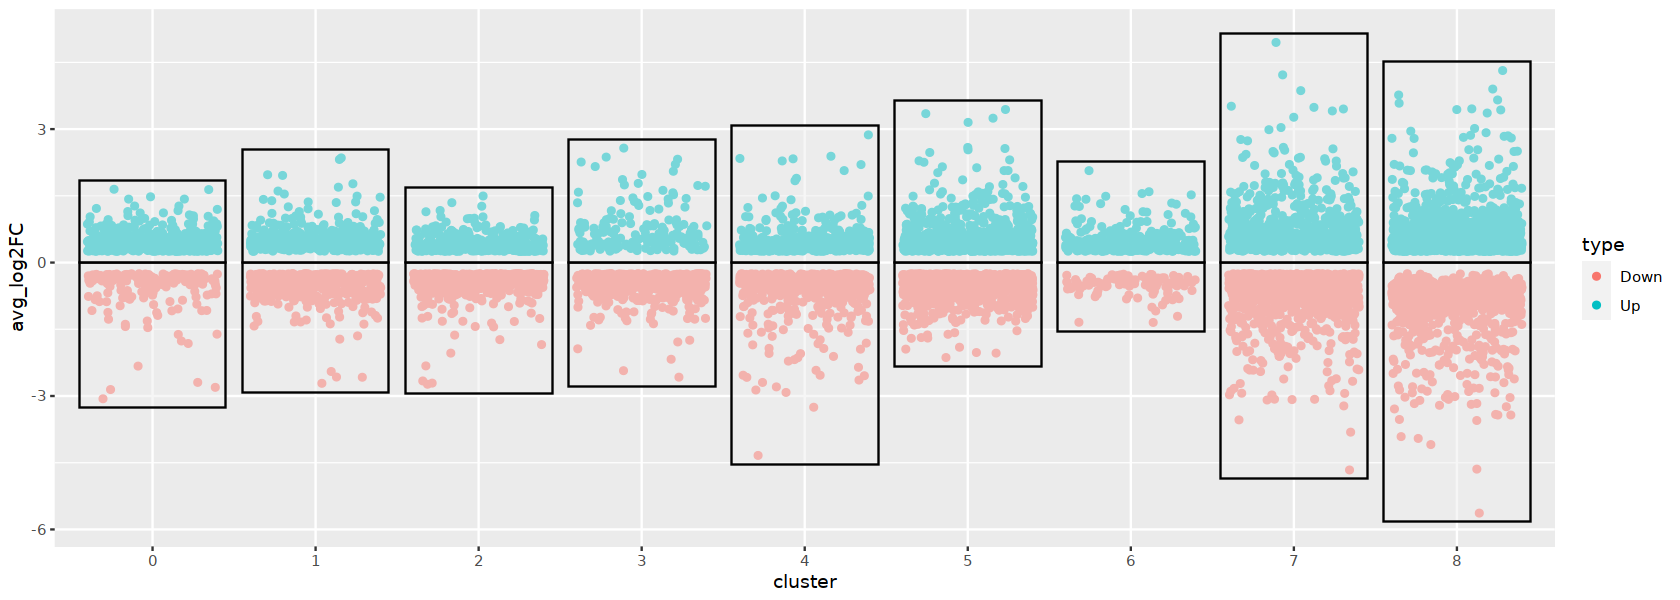

In [235]:
ggplot(pbmc.markers, aes(cluster, avg_log2FC)) +
geom_jitter(aes(color = type)) +
geom_col(data = back.data,aes(x = cluster,y = min),fill="grey93",color="black",alpha=0.5) +
geom_col(data = back.data,aes(x = cluster,y = max),fill="grey93",color="black",alpha=0.5)

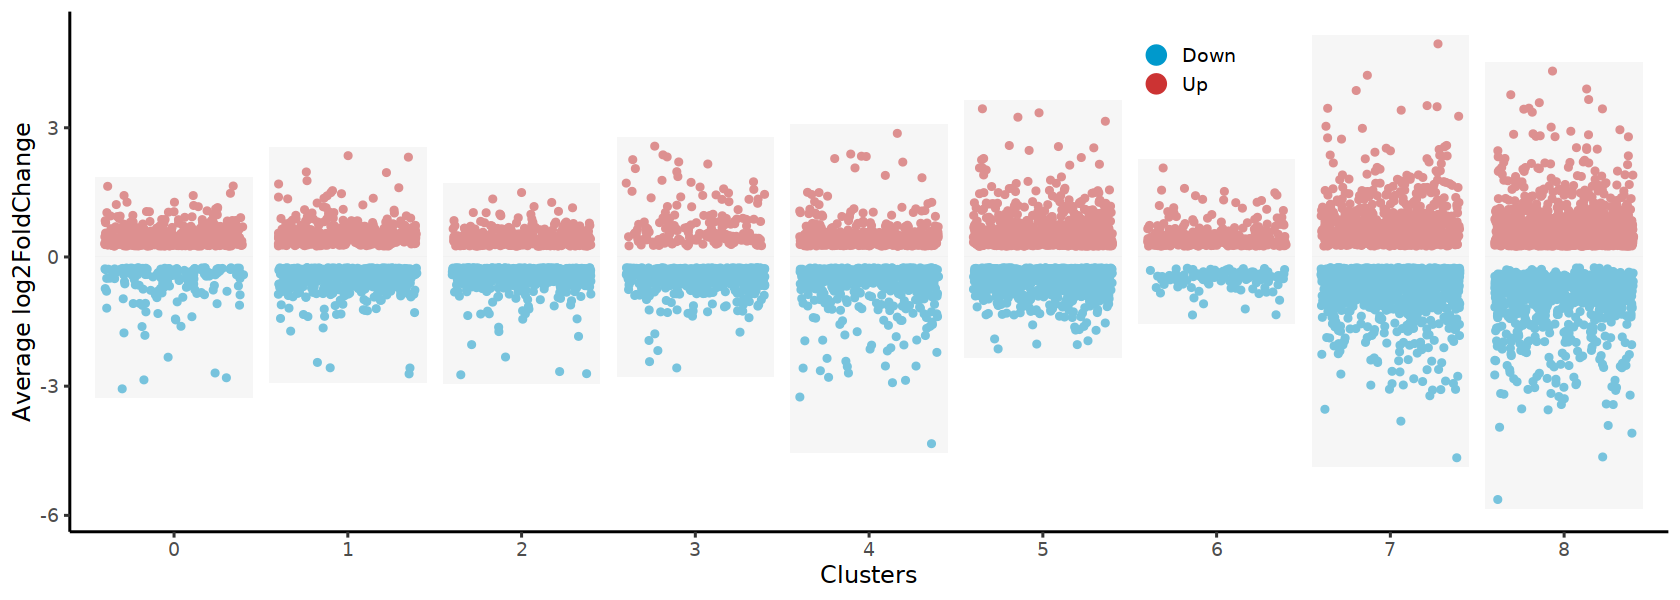

In [236]:
ggplot(pbmc.markers, aes(cluster, avg_log2FC)) +
geom_jitter(aes(color = type)) +
geom_col(data = back.data,aes(x = cluster,y = min),fill="grey93",alpha=0.5) +
geom_col(data = back.data,aes(x = cluster,y = max),fill="grey93",alpha=0.5) +
scale_color_manual(values=c(Down="#0099CC",Up="#CC3333"))+
theme_classic(base_size = 14) +
theme(panel.grid = element_blank(),legend.position = c(0.7,0.9),
legend.title = element_blank(),
legend.background = element_blank()) +
xlab('Clusters') + ylab('Average log2FoldChange') +
guides(color = guide_legend(override.aes = list(size = 5)))

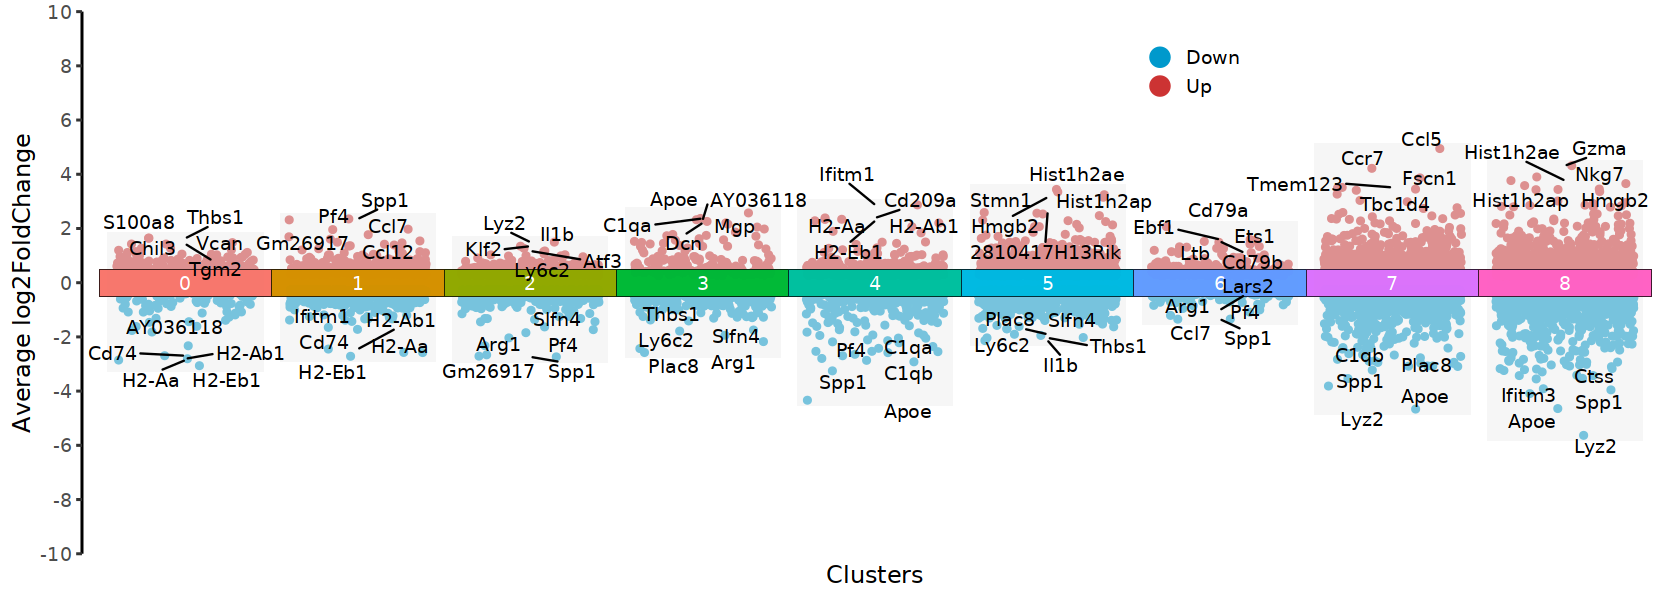

In [238]:
library(ggrepel)
cell <-unique(pbmc.markers$cluster)
up.top<- data.frame()
for(n in 1:length(cell)){
tmp <- pbmc.markers %>% filter(cluster==cell[n]) %>% filter(avg_log2FC>0)%>% arrange(desc(avg_log2FC)) %>%head(5)
up.top <- rbind(up.top,tmp)
}

down.top<- data.frame()

for(n in 1:length(cell)){
tmp <- pbmc.markers %>% filter(cluster==cell[n]) %>% filter(avg_log2FC<0)%>% arrange(avg_log2FC) %>%head(5)
down.top <- rbind(down.top,tmp)
}

ggplot(pbmc.markers, aes(cluster, avg_log2FC)) +
geom_jitter(aes(color = type)) +

geom_col(data = back.data,aes(x = cluster,y = min),fill="grey93",alpha=0.5) +

geom_col(data = back.data,aes(x = cluster,y = max),fill="grey93",alpha=0.5) +

scale_color_manual(values=c(Down="#0099CC",Up="#CC3333"))+

scale_y_continuous(breaks = seq(-10, 10, 2), labels = as.character(seq(-10, 10, 2)),expand = c(0, 0),limits = c(-10, 10)) +

theme_classic(base_size = 14) +

theme(panel.grid = element_blank(),
legend.position = c(0.7,0.9),
legend.title = element_blank(),
legend.background = element_blank()) +
xlab('Clusters') + ylab('Average log2FoldChange') +

guides(color = guide_legend(override.aes = list(size = 5)))+

#geom_col(data = back.data,aes(x = cluster,y = 0.5,fill=cluster),show.legend = F)+

#geom_col(data = back.data,aes(x = cluster,y = -0.5,fill=cluster),show.legend = F)

geom_tile(aes(x = cluster,y = 0,fill = cluster),color = 'black',height = 1,alpha = 0.3,show.legend = F)+

geom_text(data=back.data,aes(x = cluster,y = 0,label = cluster),size=4,color="white") +
theme(axis.line.x = element_blank(),
axis.text.x = element_blank(),
axis.ticks.x = element_blank()) +
geom_text_repel(data = up.top,aes(x = cluster,y = avg_log2FC,label = gene),max.overlaps = 50)+

geom_text_repel(data = down.top,aes(x = cluster,y = avg_log2FC,label = gene),max.overlaps = 50)


In [239]:
ggsave('mmacro5.pdf',height =  6,width = 14)

In [217]:
saveRDS(immune.combined,file = 'myeloid.rds')

In [ ]:
# 0 ,2 monocyte 
# 1 arg1 pf4  macro1
# 3. macro2
# 4 macro3
# 5,8 macro4
# 7 ccr7 阳性

In [2]:
immune.combined = readRDS('./myeloid.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [5]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject



In [6]:
Idents(immune.combined) = 'seurat_clusters'

In [7]:
label = c('mono1','macro1','mono2','macro2','macro3','macro4','macro5','macro6','macro7')

In [8]:
celltype =  data.frame(ClusterID=c(0:8), celltype=label, stringsAsFactors = FALSE)

In [9]:
immune.combined@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  immune.combined@meta.data[which(immune.combined@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

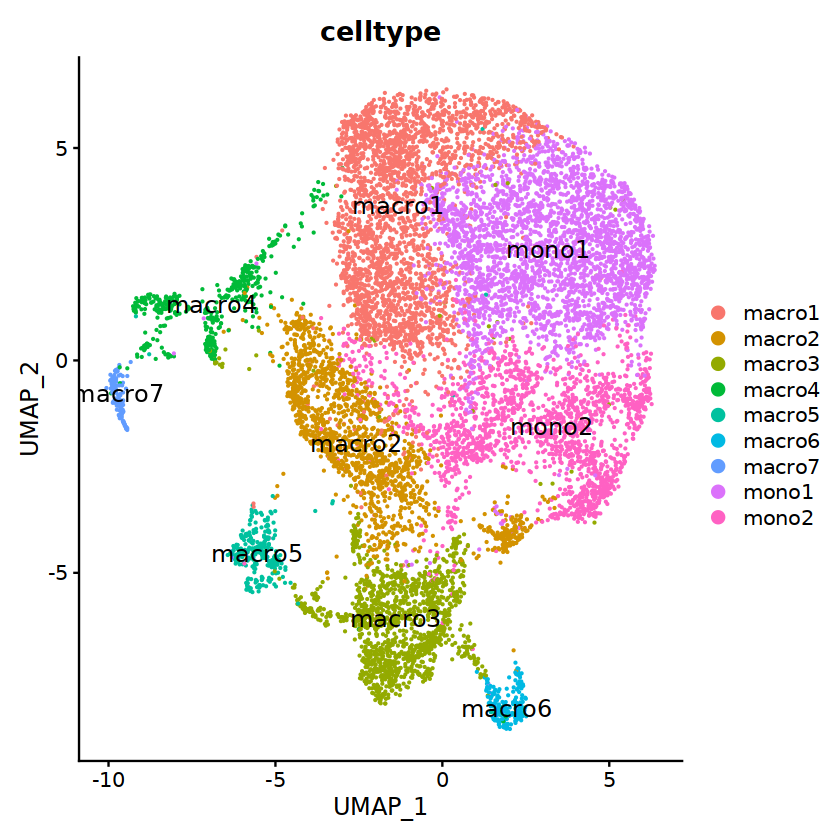

In [10]:
DimPlot(immune.combined, group.by="celltype", label=T, label.size=5, reduction='umap')

In [12]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [13]:
ggsave('mmacro6.pdf')

Saving 6.67 x 6.67 in image


In [14]:
options(repr.plot.height = 5,repr.plot.width = 6)

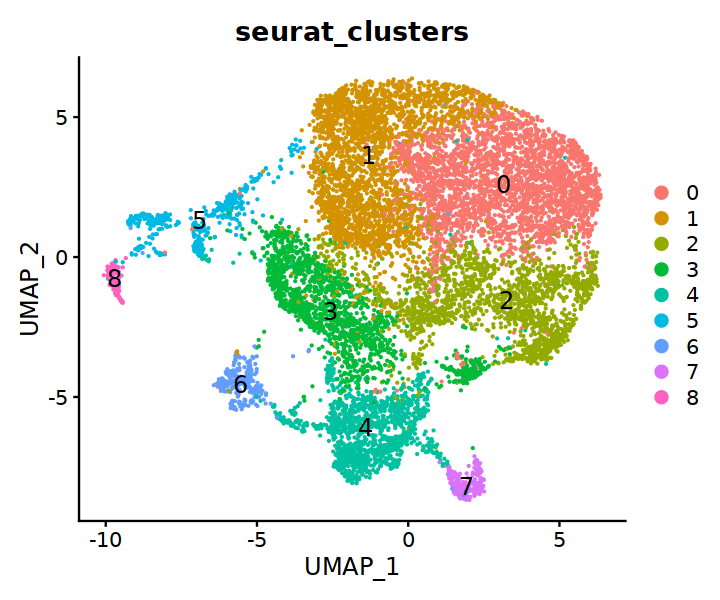

In [15]:
DimPlot(immune.combined, group.by="seurat_clusters", label=T, label.size=5, reduction='umap')

In [16]:
ggsave('mmacro7.pdf')

Saving 6.67 x 6.67 in image


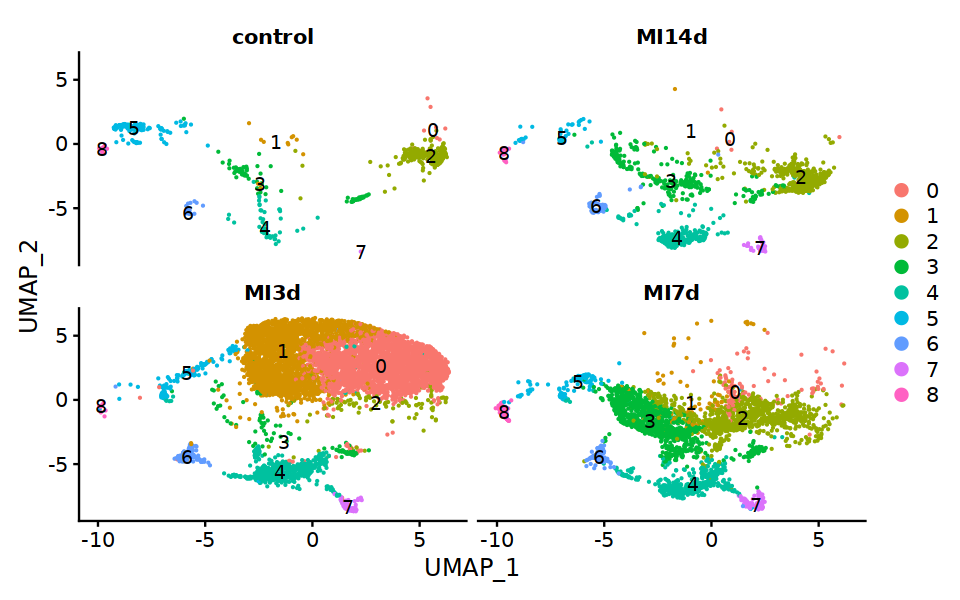

In [22]:
DimPlot(immune.combined, reduction = "umap", split.by  = "orig.ident",ncol = 2,label =T)

In [23]:
ggsave('mmacro8.pdf',height = 9,width = 9)

In [314]:
Idents(immune.combined) = 'orig.ident'

table(immune.combined$seurat_clusters,Idents(immune.combined))

   
    control MI14d MI3d MI7d
  0       8     6 2838  107
  1      12     2 2611   80
  2     240   475  100  970
  3      74   242  102 1120
  4      48   223  629  515
  5     158    38  137  125
  6      24    55  114   83
  7       1    32   73  100
  8      11    15   13   96

In [18]:
options(repr.plot.width = 8)

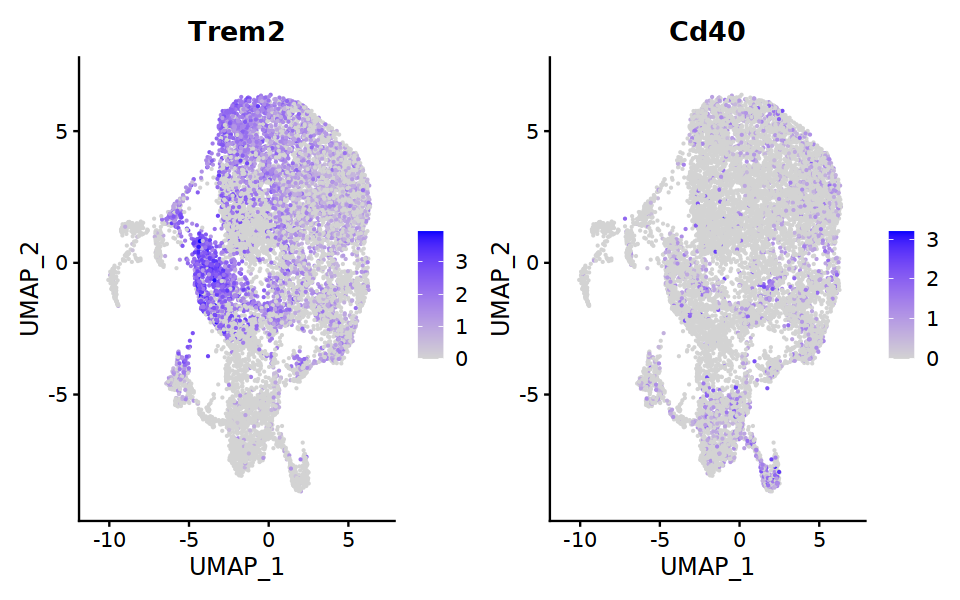

In [19]:
FeaturePlot(immune.combined,features = c('Trem2','Cd40'))

In [21]:
ggsave('mmacro10.pdf',height = 9,width = 9)

In [320]:
VlnPlot(immune.combined,features = c('Ccr2','Trem2'),group.by = 'seurat_clusters',pt.size = 0.5)

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: H-2”


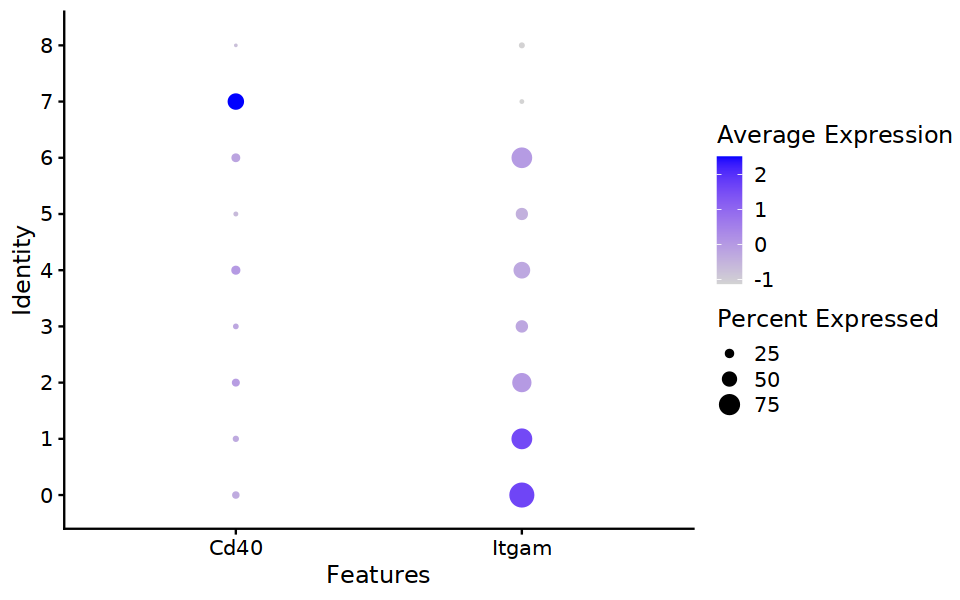

In [297]:
DotPlot(immune.combined,features = c('H-2','Cd40','Itgam'),group.by = 'seurat_clusters')

### 单拉c6出来聊聊


In [28]:
gene = c('Il10','Ptprc','Cd40','Tnfrsf1b','Il6','Il4i1','Il27','Cd86','Trem2','Malt1','Clcf1')

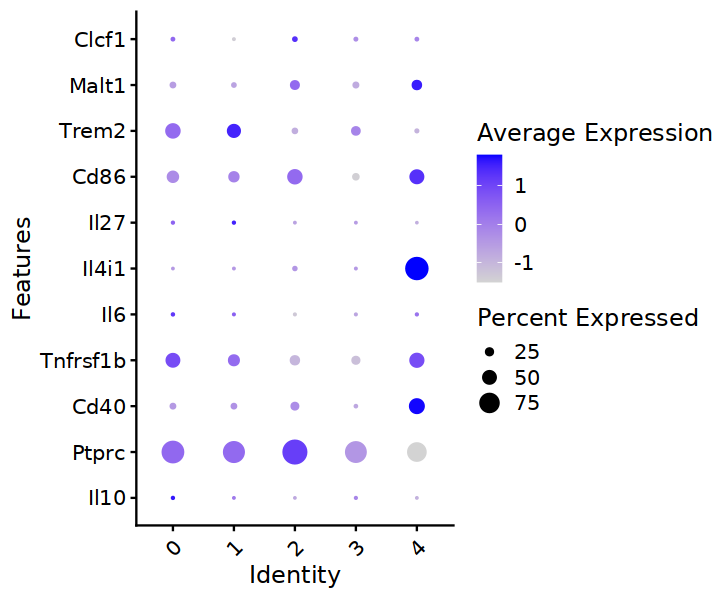

In [56]:
DotPlot(immune.combined, features = gene,
assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
vjust = 0.5, hjust=0.5))

### 

In [36]:
Idents(immune.combined) = 'seurat_clusters'

In [37]:
c1 = subset(immune.combined,idents = c(7))

In [38]:
c1 = immune.combined

In [39]:
Idents(c1) = 'orig.ident'

In [40]:
options(repr.plot.height = 5,repr.plot.width = 6)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: Trem21”
Warning message:
“Scaling data with a low number of groups may produce misleading results”
Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


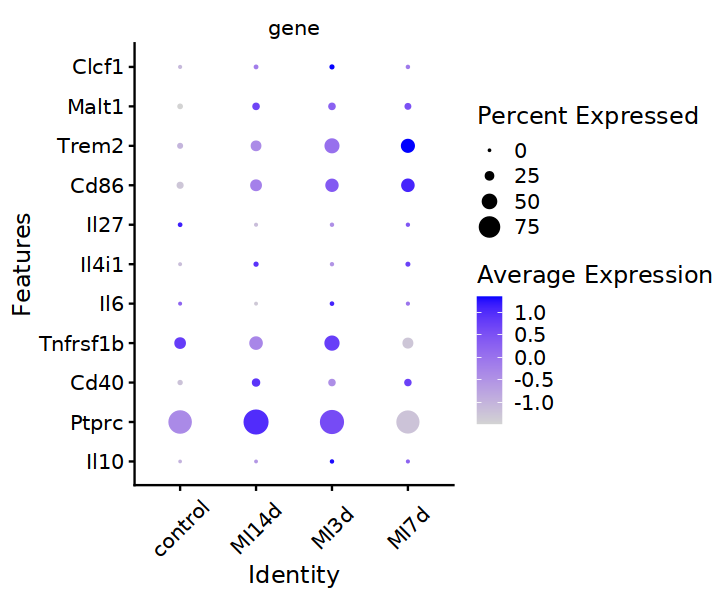

In [41]:
DotPlot(c1, features = gene,
assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
vjust = 0.5, hjust=0.5))

In [42]:
gene = read.table('./sec.protein.txt',header =T)

In [43]:
library(dplyr)

In [44]:
Idents(c1) ='orig.ident'

df <- as.data.frame(AverageExpression(object = c1)$RNA)
library(tidyr)
df %>%
    filter(row.names(.) %in% gene$gene) %>% 
    apply(., 1, function(y) (y - mean(y)) / sd(y) ^ as.logical(sd(y))) %>% 
          t() -> df2
df2 %>% as.data.frame() %>% 
    tibble::rownames_to_column(var = "gene")%>%
    right_join(gene) %>%
    pivot_longer(cols = `control`:`MI7d`, names_to = "cluster_name", values_to = "exp")%>%
    group_by(gene) %>%
    mutate(exp = as.numeric(scale(exp))) %>%
    dplyr::ungroup() -> df3

cluster_name <- c("control",'MI3d','MI7d','MI14d')


Joining with `by = join_by(gene)`


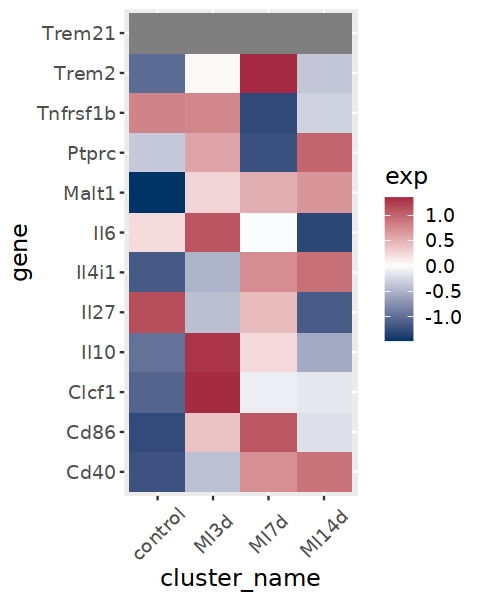

In [45]:
library(ggplot2)
options(repr.plot.height = 5,repr.plot.width = 4)
df3 %>% ggplot(aes(x = cluster_name,
               y = gene,
               fill = exp)) +
    geom_tile() +
    scale_fill_gradient2(low="#003366", high="#990033", mid="white") +
    scale_x_discrete(limits = cluster_name) +
  theme(axis.text.x =element_text(angle =45,hjust =0.5,vjust = 0.5))+ theme(text = element_text(size = 14))

In [51]:
c1 = scRNA

control      MI14d       MI3d       MI7d 
0.02153546 0.15237975 1.20464001 0.99641085

control     MI14d      MI3d      MI7d 
0.1498300 0.1714253 0.2316373 0.1763302

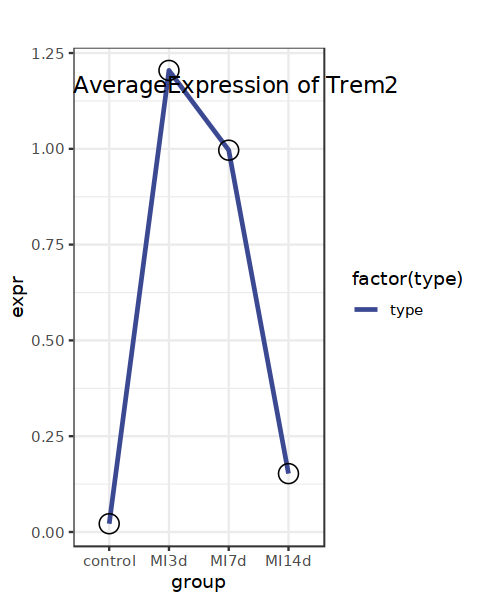

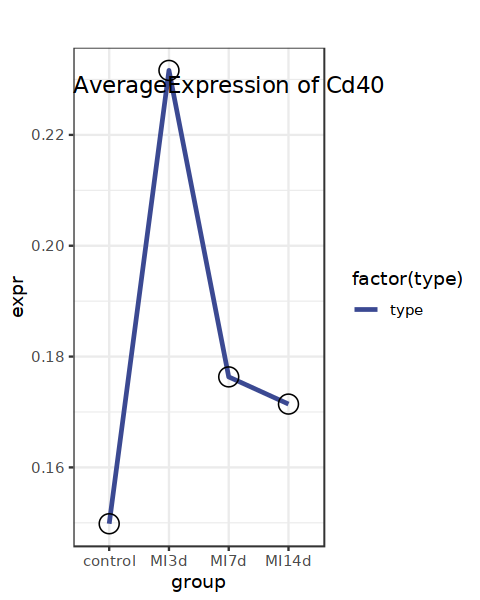

In [53]:

myeloid = c1

dat1=AverageExpression(myeloid, group.by = "orig.ident")$RNA

dat1['Trem2',]
data = data.frame(expr = dat1['Trem2',])
data = data %>% tibble::rownames_to_column('group')
data$group = factor(data$group,levels = c('control','MI3d','MI7d','MI14d'))
data$type = 'type'


library(ggalt)
ggplot(data, aes(group, expr, group=type, color=factor(type))) +
  geom_line(size=1) +
  geom_point(shape=21,size=5,colour="black") +
  ggsci::scale_fill_aaas() +
  ggsci::scale_color_aaas()+theme_bw()+
labs(title = 'AverageExpression of Trem2')+
  theme(plot.title=element_text(margin=margin(t=40,b=-30)))

ggsave('Trem2.pdf',height = 6,width = 6)



dat1['Cd40',]
data = data.frame(expr = dat1['Cd40',])
data = data %>% tibble::rownames_to_column('group')
data$group = factor(data$group,levels = c('control','MI3d','MI7d','MI14d'))
data$type = 'type'
library(ggalt)
ggplot(data, aes(group, expr, group=type, color=factor(type))) +
  geom_line(size=1) +
  geom_point(shape=21,size=5,colour="black") +
  ggsci::scale_fill_aaas() +
  ggsci::scale_color_aaas()+theme_bw()+
labs(title = 'AverageExpression of Cd40')+
  theme(plot.title=element_text(margin=margin(t=40,b=-30)))
ggsave('Cd40.pdf',height = 6,width = 6)

control      MI14d       MI3d       MI7d 
0.04495189 0.11305240 0.71797490 0.34939521

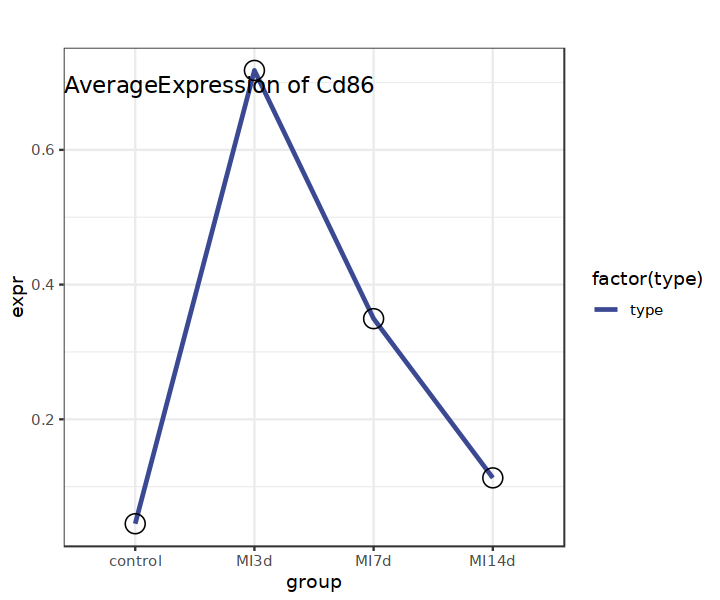

In [182]:
dat1['Cd86',]
data = data.frame(expr = dat1['Cd86',])
data = data %>% tibble::rownames_to_column('group')
data$group = factor(data$group,levels = c('control','MI3d','MI7d','MI14d'))
data$type = 'type'
library(ggalt)
ggplot(data, aes(group, expr, group=type, color=factor(type))) +
  geom_line(size=1) +
  geom_point(shape=21,size=5,colour="black") +
  ggsci::scale_fill_aaas() +
  ggsci::scale_color_aaas()+theme_bw()+
labs(title = 'AverageExpression of Cd86')+
  theme(plot.title=element_text(margin=margin(t=40,b=-30)))

In [185]:
data.frame(expr = dat1[gene,])

,expr.control,expr.MI14d,expr.MI3d,expr.MI7d
,<dbl>,<dbl>,<dbl>,<dbl>
Il10,6.494758e-05,0.004177042,0.05548098,0.01944891
Ptprc,1.554661e+00,2.578739622,7.21310706,3.58749987
Cd40,1.498300e-01,0.171425250,0.23163725,0.17633015
Tnfrsf1b,1.900707e-01,0.289813198,1.05128137,0.40519999
Il6,4.630219e-02,0.054554736,0.20719654,0.14680976
Il4i1,6.801856e-02,0.101548166,0.12845982,0.11926544
Il27,3.744907e-03,0.002651868,0.02975903,0.01753029
Cd86,4.495189e-02,0.113052397,0.71797490,0.34939521
Trem2,2.153546e-02,0.152379750,1.20464001,0.99641085


In [101]:
library(corrr)
library(dplyr)



Warning message:
“package ‘corrr’ was built under R version 4.2.3”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


### 通路与基因的相关性热图

In [23]:
bp =read.csv('BP_ego.csv',row.names = 1)

In [24]:
bp = bp[1:50,]

In [10]:
head(bp,3)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0044772,GO:0044772,mitotic cell cycle phase transition,98/1790,451/28943,2.608536e-28,2.288729e-24,1.516795e-24,Nabp1/Kif14/Nuf2/Cenpf/Dtl/Mastl/Nek6/Spc25/Bub1b/Bub1/E2f1/Ube2c/Pim2/Actl6a/Ccna2/Iqgap3/Muc1/Cks1b/Cenpe/Eif4e/Anp32b/Stil/Nasp/Plk3/Cdc20/Cdca8/Rcc1/Rcc2/Dbf4/Abcb1b/Tacc3/Ankrd17/Cit/Gpnmb/Mad2l1/Bid/Ptpn6/Foxm1/Ube2s/Calm3/Ercc2/Ccne1/Anapc15/Rrm1/Taf10/Usp47/Plk1/Cdk1/Tjp3/Fzr1/E2f7/Mdm2/Eif4ebp1/Camk2g/Apex1/Mre11a/Cdkn2d/Spc24/Chek1/Hinfp/Zpr1/Rps27l/Ccnb2/Ttk/Spdl1/Lsm11/Ppp2ca/Ctc1/Aurkb/Rad51c/Smarce1/Psme3/Brca1/Birc5/Rptor/Sirt7/Cks2/Ccnb1/Plk2/Calm1/Gpr132/Myc/Donson/Ccnf/Cdkn1a/Aif1/Ier3/Mad2l1bp/Ndc80/Spast/Mta3/Zfp36l2/Rbbp8/Cdc25c/Lmnb1/Cep192/Nfatc1/Cdca5,98
GO:0032640,GO:0032640,tumor necrosis factor production,57/1790,193/28943,6.445606e-24,2.827687e-20,1.873975e-20,Ly96/Arid5a/Il10/Ptprc/Fcgr3/Fcer1g/Slamf9/Rasgrp1/Thbs1/Sash3/Tlr2/Zc3h12a/Ptafr/Il6/Tlr1/Tlr6/Oas1g/Flt3/Gpnmb/Clec4a1/Clec4a3/Clec4a2/Ptpn6/Bcl3/Zfp36/Tyrobp/Cd33/Spn/Pycard/Tnfaip3/Sirt1/Mif/Cyba/Il18/Myd88/Cx3cr1/Ccr2/Ccr5/Havcr2/Arrb2/Ccl3/Ccl4/Ccr7/Stat3/Cd300ld/Trim27/Ripk1/Arg2/Ptger4/Tspo/Nlrc3/Mapk14/Trem2/Ticam1/Cd14/Frmd8/Jak2,57
GO:0007059,GO:0007059,chromosome segregation,80/1790,369/28943,2.938758e-23,6.446167e-20,4.272027e-20,Actr3/Kif14/Nuf2/Cenpf/Nsl1/Nek2/Nek6/Spc25/Bub1b/Knstrn/Bub1/Mapre1/Fam83d/Top1/Ube2c/Slc25a5/Kif4/Ect2/Actl6a/Fbxw7/Cenpe/Smc2/Kif2c/Cdc20/Cdca8/Sfpq/Rcc1/Cdc42/Rcc2/Tacc3/Ncapg/Cit/Ran/Zcwpw1/Mad2l1/Ercc2/Ccne1/Prc1/Anapc15/Plk1/Kif22/Mki67/Nup43/Syce2/Cenpn/Map10/Dlgap5/Esco2/Cdca2/Mre11a/Spc24/Kif23/Ttk/Spdl1/Ndel1/Aurkb/Mis12/Spag5/Rad51c/Top2a/Smarce1/Brca1/Birc5/Sirt7/Ccnb1/Cenpk/Dscc1/Racgap1/Bex6/Naa50/Ube2i/Srpk1/Mad2l1bp/Ddx11/Ndc80/Cep192/Ska1/Cdca5/Fen1/Kif11,80


In [11]:
gson_BP_mmu <- clusterProfiler::gson_GO(OrgDb = 'org.Mm.eg.db', keytype = 'ENTREZID', ont = "BP")



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

Loading required package: org.Mm.eg.db

Loading required package: AnnotationDbi

Warning message:
“package ‘Annot

In [12]:
gson::write.gson(gson_BP_mmu, file = "GO_BP_mmu.gson")

In [13]:
kk2= gson_BP_mmu

In [14]:
kegg.list <- dplyr::left_join(kk2@gsid2name,
                              kk2@gsid2gene,
                              by = "gsid")
head(kegg.list)

,gsid,name,gene
,<chr>,<chr>,<chr>
1,GO:0000001,mitochondrion inheritance,NA
2,GO:0000002,mitochondrial genome maintenance,11545
3,GO:0000002,mitochondrial genome maintenance,12628
4,GO:0000002,mitochondrial genome maintenance,13804
5,GO:0000002,mitochondrial genome maintenance,16882
6,GO:0000002,mitochondrial genome maintenance,17258


In [15]:
gene_name <- clusterProfiler::bitr(kegg.list$gene, 
                                   fromType = "ENTREZID", 
                                   toType = "SYMBOL", 
                                   OrgDb = "org.Mm.eg.db")
kegg.list <- dplyr::full_join(kegg.list,
                              gene_name,
                              by = c("gene"="ENTREZID"))

'select()' returned 1:1 mapping between keys and columns

Warning message in clusterProfiler::bitr(kegg.list$gene, fromType = "ENTREZID", :
“0% of input gene IDs are fail to map...”


In [16]:
kegg.list <- kegg.list[complete.cases(kegg.list[, c("gene", "SYMBOL")]), ]
head(kegg.list)

,gsid,name,gene,SYMBOL
,<chr>,<chr>,<chr>,<chr>
2,GO:0000002,mitochondrial genome maintenance,11545,Parp1
3,GO:0000002,mitochondrial genome maintenance,12628,Cfh
4,GO:0000002,mitochondrial genome maintenance,13804,Endog
5,GO:0000002,mitochondrial genome maintenance,16882,Lig3
6,GO:0000002,mitochondrial genome maintenance,17258,Mef2a
7,GO:0000002,mitochondrial genome maintenance,17527,Mpv17


In [19]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [23]:
kegg.list %>% filter(name %in% bp$Description) ->kegg.list

In [24]:
kegg.list$name <- factor(kegg.list$name)
kegg.list <- kegg.list %>% 
  dplyr::group_split(name, .keep = F) %>%
  purrr::map( ~.x %>% dplyr::pull(SYMBOL) %>% unique(.)) %>%
  purrr::set_names(levels(kegg.list$name))
head(kegg.list)

$`adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains`
  [1] "Ada"           "Adam17"        "Ager"          "Ahr"          
  [5] "Aicda"         "Aire"          "Arg1"          "Rab27a"       
  [9] "Azgp1"         "B2m"           "Bach2"         "Bcl10"        
 [13] "Bcl3"          "Bcl6"          "Btk"           "Serping1"     
 [17] "C1qa"          "C1qb"          "C1qbp"         "C1qc"         
 [21] "C2"            "C3"            "C3ar1"         "C4b"          
 [25] "C4bp"          "C9"            "Ccr6"          "Cd19"         
 [29] "Cd1d1"         "Cd1d2"         "Cd24a"         "Cd28"         
 [33] "Cd4"           "Cd81"          "Cd8a"          "Cfh"          
 [37] "Cfi"           "Ccr2"          "Ccr7"          "Cr2"          
 [41] "Crp"           "Cr1l"          "Csf2rb"        "Csf2rb2"      
 [45] "Ctsc"          "Ctsh"          "Cd55"          "Cd55b"        
 [49] "Dlg1"          "Dpp4"          "Emp2"          "Ephb2"        
 [53] "Ephb6"         "Ercc1"         "Fadd"          "Fas"          
 [57] "Fcer1a"        "Fcer1g"        "Fcer2a"        "Fcgr1"        
 [61] "Fcgr2b"        "Fcgr3"         "Fgl2"          "Il4i1"        
 [65] "Fut7"          "Fzd5"          "Gata3"         "Gba"          
 [69] "Lilrb4b"       "Lilrb4a"       "Gzmb"          "H2-Aa"        
 [73] "H2-Ab1"        "H2-Bl"         "H2-D1"         "H2-Eb1"       
 [77] "H2-K1"         "H2-L"          "H2-M10.1"      "H2-M2"        
 [81] "H2-M3"         "H2-M9"         "H2-DMa"        "H2-DMb1"      
 [85] "H2-DMb2"       "H2-Oa"         "H2-Ob"         "H2-Q1"        
 [89] "H2-Q10"        "H2-Q2"         "H2-Q4"         "H2-Q7"        
 [93] "H2-Q8"         "H2-T10"        "H2-T22"        "H2-T23"       
 [97] "H2-T24"        "H2-T3"         "Mr1"           "Hc"           
[101] "Ptpn6"         "Hfe"           "Foxj1"         "Hlx"          
[105] "Hmgb1"         "Hprt"          "Hpx"           "Hras"         
[109] "Hspa8"         "Hspd1"         "Icam1"         "Ifnb1"        
[113] "Ifng"          "Ighg2b"        "Ighg1"         "Ighm"         
[117] "Igh-7"         "Igh-8"         "Igh-J"         "Igh-VJ558"    
[121] "Il18bp"        "Igkc"          "Igll1"         "Cd74"         
[125] "Il12a"         "Il12b"         "Il12rb1"       "Il13ra2"      
[129] "Il17ra"        "Il18"          "Il18rap"       "Il1b"         
[133] "Il1r1"         "Il18r1"        "Il2"           "Il4"          
[137] "Il4ra"         "Il6"           "Il6ra"         "Il7r"         
[141] "Il9"           "Il9r"          "Inpp5d"        "Irf1"         
[145] "Irf4"          "Jag1"          "Jak2"          "Jak3"         
[149] "Klrd1"         "Lef1"          "Gzmm"          "Loxl3"        
[153] "Anxa1"         "Xcl1"          "Lta"           "Il1rl1"       
[157] "Ly9"           "Lyst"          "Smad7"         "Masp2"        
[161] "Mbl1"          "Mbl2"          "Cd46"          "Mef2c"        
[165] "Mlh1"          "Msh2"          "Msh6"          "Myd88"        
[169] "Nfkb2"         "Notch1"        "Slc11a1"       "P2rx7"        
[173] "Enpp1"         "Prf1"          "Phb"           "Pirb"         
[177] "Prkcd"         "Prkcq"         "Prkcz"         "Pla2g4a"      
[181] "Pms2"          "Pnp"           "Pou2f2"        "Ppp3cb"       
[185] "Ptprc"         "Nectin2"       "Relb"          "Rora"         
[189] "Rorc"          "Sema4a"        "Foxp3"         "Kdm5d"        
[193] "Serpinb9b"     "Serpinb9"      "Spn"           "Stat3"        
[197] "Stat6"         "Supt6"         "Swap70"        "Tap2"         
[201] "Tgfb1"         "Tnf"           "Tnfaip3"       "Tnfrsf1b"     
[205] "Cd40"          "Cd40lg"        "Cd70"          "Traf2"        
[209] "Traf6"         "Trex1"         "Tfrc"          "Gfus"         
[213] "Tnfsf4"        "Ung"           "Vegfa"         "Was"          
[217] "Zbtb7b"        "Zp3"           "Zp3r"          "Gadd45g"      
[221] "Ccl19"         "Tn

In [25]:
library(irGSEA)

In [33]:
scRNA <- irGSEA.score(object = scRNA, assay = "RNA", slot = "data",
                             custom = T, geneset = kegg.list, 
                              method = c("AUCell","UCell","singscore","ssgsea", "JASMINE", "viper"),
                             kcdf = 'Gaussian')

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version

Calculate AUCell scores

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = T

[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“10208 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“10205 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9589 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9307 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9392 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9395 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“10288 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“10252 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9295 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9275 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Warning message in .local(expr, gset.idx.list, ...):
“Using 'dgCMatrix' objects as input is still in an experimental stage.”
Warning message in .filterFeatures(expr, method):
“9359 genes with constant expression values throuhgout the samples.”


[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."


Finish calculate ssgsea scores

Calculate JASMINE scores

Finish calculate jasmine scores

Calculate viper scores

Finish calculate viper scores

